# Linear Regression

In [62]:
from idlelib.pyparse import trans

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import label

## Numerical Solution - Gradient Descent


### Practical Part
- Implement gradient descent for some simple functions.
- See the functions in the notebook.
- Vary the learning rate. 
- Consider the simultaneous optimization problem. What is the implication of your findings?

### Understanding the learning rate
Consider the following functions:
- $f_1(x) = x^2$
- $f_2(x) = x^3$
- $f_3(x) = \sin (x) + 0.01\cdot (x- 1.5\pi )^2$

Find their absolute minima by gradient descent. Choose different starting values $x_0$ and vary the learning rate from very small to very large values. 
Plot the function and plot each step of gradient descent i.e. the series $x_0$, $x_1$, ... until the minimum $x_\text{min}$. 



In [63]:
import math 

def f1(x):
    return x**2

def f1_prime(x):
    return 2*x

def f2(x):
    return x**3

def f2_prime(x):
    return 3*x**2

def f3(x):
    return np.sin(x) + 0.01*(x- 1.5*math.pi)**2

def f3_prime(x):
    return np.cos(x) + 2.*0.01*(x-1.5*math.pi)


# TODO
def plot_gd(f, f_prime, x0, lr, epochs):
    """This function realizes gradient descent algorithm on the function f. It creates a plot of the function 
    inccuding all gradient descent steps. 
    Inputs:
     - f: function
     - f_prime: first derivate function of f
     - x0: initial value to start gradient descent from
     - lr: learning rate
     - epochs: number of iterations
     
    """
    # left and right limits of the plot
    lo = min(x0, -x0) 
    hi = max(x0, -x0)
    # x-values of the plot, step size 0.01 * plotting range 
    xvals = np.arange(lo, hi, 0.01*(hi-lo))
    plt.plot(xvals, f(xvals))
    x = x0
    for i in range (epochs):
        plt.plot(x, f(x), 'r*')

        # TODO insert the gradient descent step


    print ()
    print ("Final value =", x)

    



Final value = -3


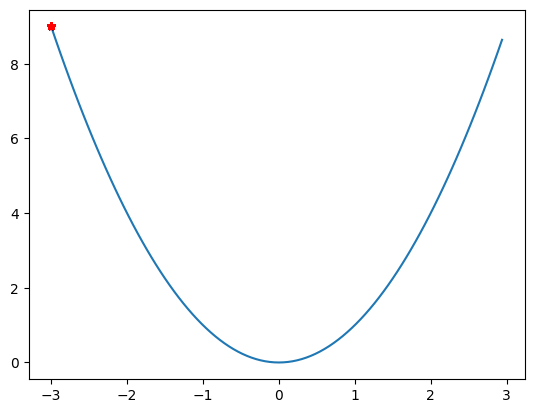

In [64]:
lr = 10# TODO - try different values (remember, search a suitable learning rate over orders of magnitude!)
EPOCHS = 100
x = -3 # initial value - change, if needed

plot_gd(f1, f1_prime, x, lr, EPOCHS)


Final value = -3


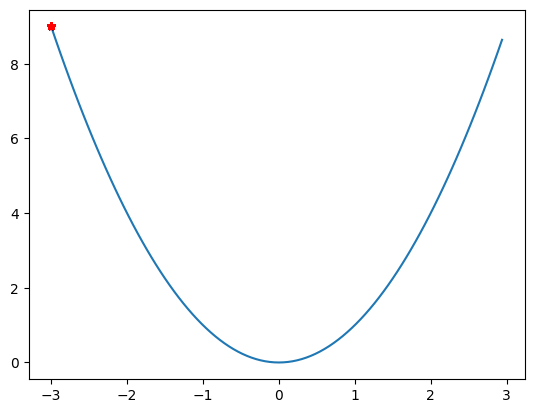

In [65]:
lr = 0.5# TODO
EPOCHS = 100
x = -3 # initial value

plot_gd(f1, f1_prime, x, lr, EPOCHS)


Final value = 3


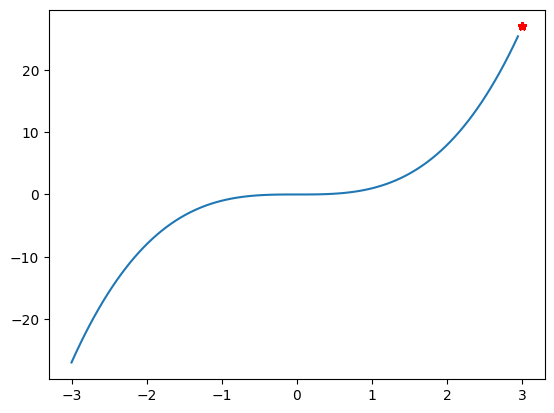

In [66]:
lr = 0.1# TODO
EPOCHS = 100
x = 3 # initial value

plot_gd(f2, f2_prime, x, lr, EPOCHS)

In [67]:
lr = # TODO
EPOCHS = 1000
x = # TODO try various initial values

plot_gd(f3, f3_prime, x, lr, EPOCHS)

SyntaxError: invalid syntax (2279980555.py, line 1)

### Implement GD for linear regression
Implement gradient descent for the following toy problem:
You have two features $x_1$ and $x_2$. Your target $y=0.5x_1 + 0.3x_2 + \epsilon$ with $\epsilon\sim \mathcal{N}(0; \sigma^2)$.

Solve the linear regression with __gradient descent__.


Find a good learning rate $\alpha$.

loss: 0.007565766143767933
loss: 0.004127611316944811
loss: 0.002767573061693548
loss: 0.0019191064974364864
loss: 0.0013371084318354054
loss: 0.0009322247478229928
loss: 0.0006500012500711866
loss: 0.0004532243322530161
loss: 0.0003160188568331439
loss: 0.0002203499121820856


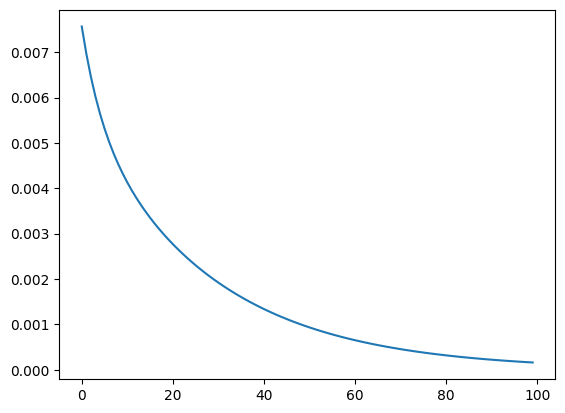

[0.53008054] [0.27145274]


In [68]:
np.random.seed(42)
x1= np.random.rand(100)
x2= np.random.rand(100)
w1=np.random.rand(1)
w2=np.random.rand(1)
y = 0.5 * x1 + 0.3 * x2 
lr = 0.1

epochs= 100
loss_history=[]
for i in range(epochs):
    # prediction
    y_pred = w1 * x1 + w2 * x2
    # calculate the loss
    loss= np.mean((y - y_pred)**2)
    # calculate gradient
    grad_w1 = (-2 / 100) * np.sum((y - y_pred) * x1)
    grad_w2 = (-2 / 100) * np.sum((y - y_pred) * x2)

    # update gradient
    w1-= lr*grad_w1
    w2-= lr*grad_w2
    
    loss_history.append(loss)
    
    if i%10==0:
        print(f'loss: {loss}')
import  matplotlib.pyplot as plt
plt.plot(range(epochs),loss_history, label= 'Mse Loss')
plt.show()
print(w1,w2)

### Simultaneous optimization

Optimize $f: \mathbb{R}^2\to\mathbb{R}^2$, $f(x_1, x_2) = (x_1^2, (a\cdot x_2)^2)$.  
Look at different values for $a$, e.g. $a=2$, $a=5$, $a=10$.

## Linear regression examples



In [69]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split


In [70]:
data = load_diabetes(return_X_y=False, as_frame=True, scaled=False)

In [71]:
data.data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [72]:
X = data.data.values
y = data.target.values

### Practical Part 1 - Implement Linear Regression 
- Split the data randomly into train and test sets (75\%/25\% is fine).
- Predict the target variable with linear regression.
- Use the scikit-learn implementation.
- Measure the errors of your prediction and try to figure out where the errors occur. 
- Ablation study: Study the effect of data normalization on the quality of your model.

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model= LinearRegression()
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=100)
model.fit(X_train, y_train)
print(f'Training score: {model.score(X_train, y_train)}')
print(f'test score: {model.score(X_test, y_test)}')
y_pred= model.predict(X_test)

Training score: 0.5063883301850682
test score: 0.5282604092102516


+ IMPORTANT: we do not do here gradient approach as fit() function computes the coefficients itself for the  model

+ other matrics

In [74]:
from sklearn.metrics import mean_squared_error, f1_score,recall_score, r2_score
mse=mean_squared_error(y_pred,y_test)
print(f'mean square loss: {mse}')
acc= r2_score(y_test,y_pred)
print(f' r2_score: {acc}')


mean square loss: 2665.237563846659
 r2_score: 0.5282604092102516


### Practical Part 2 - Regularization
- Until now, only the features themselves have been considered. 
- Add non-linear terms representing the interactions between the features.
- For second order, these terms are $x_ix_j$ for features $x_i$ and $x_j$, third order $x_ix_jx_k$, and so on.
- Limit yourself to third order and interaction terms only ($i,j,k$ mutually different)
- Re-do linear regression with these additional features.
- What do you observe?


In [83]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=3)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)
print(f'Shape before polynomial features: {X_train.shape}')
print(f'Shape after polynomial features: {X_train_poly.shape}')

Shape before polynomial features: (331, 10)
Shape after polynomial features: (331, 286)


In [93]:
# redoing the linear regression
model=LinearRegression()
model.fit(X_train_poly, y_train)
y_pred=model.predict(X_test_poly)
#model evaluation
mse=mean_squared_error(y_pred,y_test)
print(f'mean square loss: {mse}')
acc= r2_score(y_test,y_pred)
print(f' r2_score: {acc}')

mean square loss: 1117954.7917708664
 r2_score: -196.87486982221193


+ the increase in the loss and decrease in the r2 scores is probably because the model is overfitting.

### Practical Part 3 - Ridge Regression and Lasso
- Use Ridge and Lasso for the extended diabetes dataset (including the interaction terms)
- Look into the scikit-learn documentation to learn about the parameter ''alpha''. 
- For which values of alpha do you get the best model?
- When applying Lasso, figure out which features have a non-zero coefficient. 

In [94]:
# using the ridge regression on the dataset.
from sklearn.linear_model import Ridge
model= Ridge(alpha=1)
model.fit(X_train_poly,y_train)
y_pred=model.predict(X_test_poly)
print(f'The r2 score of the model after ridge regression: {r2_score(y_test, y_pred)}')
print(f'The mse of the model after ridge regression: {mean_squared_error(y_test, y_pred)}')

The r2 score of the model after ridge regression: -9.507135179693547
The mse of the model after ridge regression: 59363.284142532735


C:\Users\kashi\Desktop\Working_projects\Working_projects\NLP\pythonProject1\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.03216e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


+ while using the ridge the error decreases but still is high

In [115]:
# using the lasso regression on the model
from sklearn.linear_model import Lasso
model= Lasso(alpha=0.5)
model.fit(X_train_poly,y_train)
y_pred=model.predict(X_test_poly)
print(f'The r2 score of the model after ridge regression: {r2_score(y_test, y_pred)}')
print(f'The mse of the model after ridge regression: {mean_squared_error(y_test, y_pred)}')
model.coef_

The r2 score of the model after ridge regression: 0.3634069041997864
The mse of the model after ridge regression: 3596.6280230407056


C:\Users\kashi\Desktop\Working_projects\Working_projects\NLP\pythonProject1\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.548e+05, tolerance: 1.977e+02
  model = cd_fast.enet_coordinate_descent(


array([ 0.00000000e+00, -8.72842605e+00, -0.00000000e+00, -2.40284445e+00,
       -1.17129785e-01,  2.45582702e-01, -2.46285859e-01,  2.29808589e+00,
       -0.00000000e+00, -0.00000000e+00, -1.38790076e+00,  1.45361980e-02,
        8.44348095e-02, -7.31539184e-02,  2.21385251e-02, -1.20115225e-02,
       -2.84899443e-03, -3.91912767e-03,  6.52248766e-01, -9.91118654e-03,
        1.20300392e-02,  0.00000000e+00, -2.23401920e+00,  3.96545474e-01,
        2.37095708e-01, -9.43858979e-02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -4.86638456e-01, -6.62051496e-02,  4.18301786e-02,
       -3.65778579e-02, -1.76377810e-02,  6.98076961e-02,  9.96786456e-01,
        3.35269869e-01,  5.38882030e-03, -2.14356713e-03,  8.32688497e-03,
       -1.34122359e-03,  7.28774815e-03, -2.39699884e-01, -1.86286299e-01,
       -2.76904099e-03, -8.86620458e-04,  1.96759524e-03, -1.18110434e-03,
       -7.24168712e-02, -4.90670253e-02,  6.07308472e-03, -3.25213637e-03,
        5.92551913e-03,  

C:\Users\kashi\Desktop\Working_projects\Working_projects\NLP\pythonProject1\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.493e+05, tolerance: 1.977e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\kashi\Desktop\Working_projects\Working_projects\NLP\pythonProject1\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.510e+05, tolerance: 1.977e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\kashi\Desktop\Working_projects\Working_projects\NLP\pythonProject1\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did

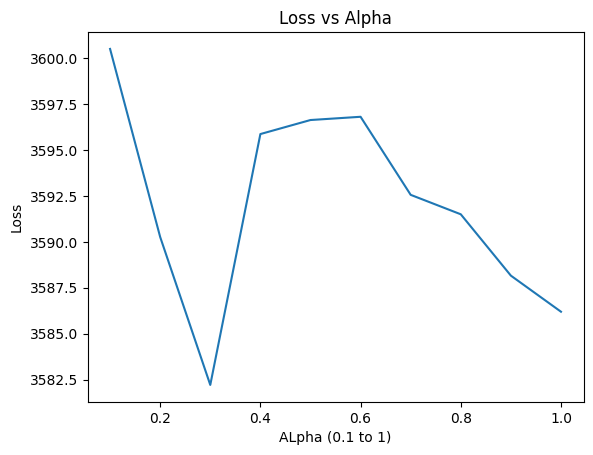

In [114]:
import matplotlib.pyplot as plt

history=[]
for i in range(10):
    model=Lasso((i+1)/10,max_iter=1000).fit(X_train_poly,y_train)
    y_pred=model.predict(X_test_poly)
    history.append(mean_squared_error(y_test, y_pred))
    
plt.plot(np.arange(0.1,1.1,0.1),history)
plt.xlabel('ALpha (0.1 to 1)')
plt.ylabel('Loss')
plt.title('Loss vs Alpha')
plt.show()

C:\Users\kashi\Desktop\Working_projects\Working_projects\NLP\pythonProject1\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.30851e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\kashi\Desktop\Working_projects\Working_projects\NLP\pythonProject1\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.6273e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\kashi\Desktop\Working_projects\Working_projects\NLP\pythonProject1\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.19419e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\kashi\Desktop\Working_projects\Working_projects\NLP\pythonProject1\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: L

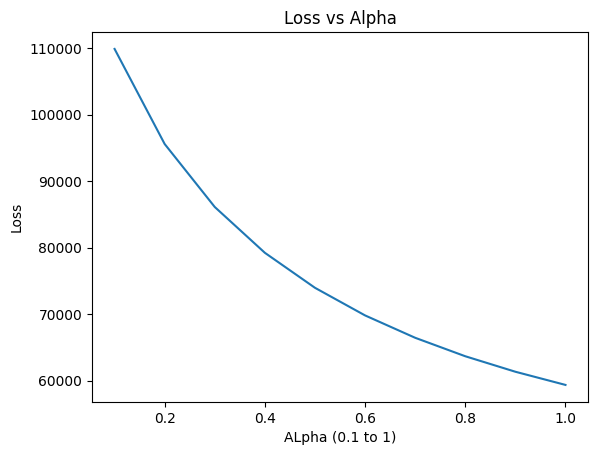

In [113]:
import matplotlib.pyplot as plt

history=[]
for i in range(10):
    model=Ridge((i+1)/10,max_iter=1000).fit(X_train_poly,y_train)
    y_pred=model.predict(X_test_poly)
    history.append(mean_squared_error(y_test, y_pred))
    
plt.plot(np.arange(0.1,1.1,0.1),history)
plt.xlabel('ALpha (0.1 to 1)')
plt.ylabel('Loss')
plt.title('Loss vs Alpha')
plt.show()